 # <u> CIFAR10 classification with a convolutional network <u>

In this notebook we are going to train a convolutional neural network on 
the CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of
60k 32x32 RGB images in 10 different classes:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [2]:
# Load packages
import random, torch
from toytorch.datasets.load import load_CIFAR10_data, plot_CIFAR10_data
from toytorch.models import Conv_CIFAR10

### <u> Load Data<u>

Let us start by importing the data (which has been already saved in the toytorch package)
using the loader in toytorch

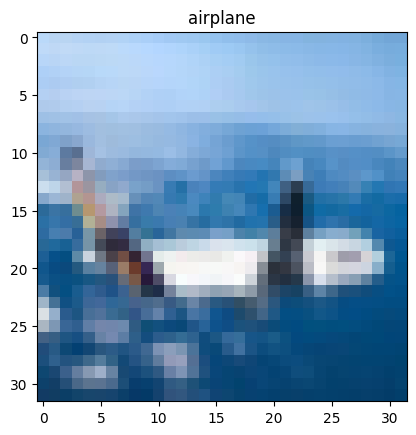

In [3]:
# Load the CIFAR10 Data
train_data, validation_data, test_data, label_dictionary = load_CIFAR10_data()
data = [train_data, validation_data, test_data]

# Plot a random image with its label
rnd = random.randint(0, len(train_data[0]))
plot_CIFAR10_data(train_data[0][rnd], train_data[1][rnd], label_dictionary)

The 60k images have been splitted as (train, validation, test) = (40k, 10k, 10k).

### <u> Initialize Model <u>

We are now going to use a convolutional neural network "Conv_CIFAR10" built in the toytorch module "models.py". 
This model corresponds to a particular combination of convolutional, pooling, linear and dropout layers, all obtained from the module "layers.py".

In [4]:
# Model Parameters
n_channels = [16, 32]
num_classes = 10
dropout_rate = 0.1

# Initialize Model
CIFAR10_model = Conv_CIFAR10(n_channels, num_classes, dropout_rate)

Number of parameters in model: 2,125,082


### <u> Train Model <u>

To efficiently train the model, it is convenient to use a GPU. We must therefore import the torch package and set the device 
to 'cuda'. Using also a torch Adam optimizer, we apply the "train_model" method in the CIFAR10 model (see "models.py" for details)

The device is: cuda


  0%|          | 0/30 [00:00<?, ?it/s]

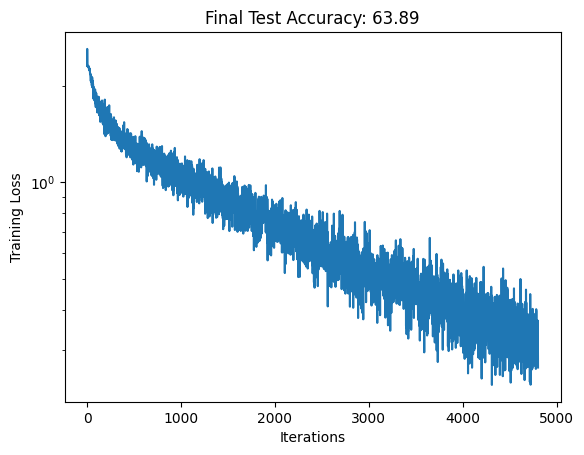

In [5]:
# Set device to GPU (if available) to speed training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'The device is: {device}')

# Parameters
optimizer = torch.optim.Adam(CIFAR10_model.parameters(), lr=5e-3)
epochs = 30
batch_size = 250

# Train
output = CIFAR10_model.train_model(data, optimizer, epochs, batch_size,
                                   device, learning_schedule=True, 
                                   save='CIFAR10_final_model')

global_training_time, stochastic_training_loss, validation_accuracy = output                                            

As expected, the loss evaluated on the training data decreases as the model is trained. On the other hand, the validation accuracy only improved up to epoch fourteen, meaning the model was overfitting after that. 

Our final model is the one with the highest validation accuracy, saved as 'CIFAR10_final_model'. Using such model we evaluate the accuracy on the test data.